<a href="https://colab.research.google.com/github/TailUFPB/Tutorials/blob/main/Pycaret/Classifica%C3%A7%C3%A3o_com_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução a classificação com Pycaret**

Apresentação da biblioteca Pycaret com ênfase em problemas de clasificação

# **Importando as bibliotecas necessárias**

In [ ]:
!pip install pycaret;
!pip install shap;

     |████████████████████████████████| 256kB 6.5MB/s 
     |████████████████████████████████| 174kB 7.5MB/s 
     |████████████████████████████████| 148.9MB 80kB/s 
     |████████████████████████████████| 6.8MB 46.1MB/s 
     |████████████████████████████████| 13.9MB 42.9MB/s 
     |████████████████████████████████| 1.8MB 51.3MB/s 
     |████████████████████████████████| 276kB 50.1MB/s 
     |████████████████████████████████| 102kB 7.9MB/s 
     |████████████████████████████████| 66.2MB 109kB/s 
     |████████████████████████████████| 266kB 46.2MB/s 
     |████████████████████████████████| 1.6MB 41.0MB/s 
     |████████████████████████████████| 327kB 44.4MB/s 
     |████████████████████████████████| 6.0MB 39.5MB/s 
     |████████████████████████████████| 163kB 49.7MB/s 
     |████████████████████████████████| 153kB 47.3MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 1.1MB 39.2MB/s

In [ ]:
import numpy as np
import pandas as pd
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# **Importando os dados do problema (Dataset)**

In [ ]:
data = pd.read_csv("/content/drive/My Drive/archive/mushrooms.csv")
display(data)

FileNotFoundError: ignored

In [ ]:
data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# **Preprocessamento dos dados**

In [ ]:
train, test = train_test_split(data, test_size=0.3, random_state=330)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     5686 non-null   object
 1   cap-shape                 5686 non-null   object
 2   cap-surface               5686 non-null   object
 3   cap-color                 5686 non-null   object
 4   bruises                   5686 non-null   object
 5   odor                      5686 non-null   object
 6   gill-attachment           5686 non-null   object
 7   gill-spacing              5686 non-null   object
 8   gill-size                 5686 non-null   object
 9   gill-color                5686 non-null   object
 10  stalk-shape               5686 non-null   object
 11  stalk-root                5686 non-null   object
 12  stalk-surface-above-ring  5686 non-null   object
 13  stalk-surface-below-ring  5686 non-null   object
 14  stalk-color-above-ring  

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     2438 non-null   object
 1   cap-shape                 2438 non-null   object
 2   cap-surface               2438 non-null   object
 3   cap-color                 2438 non-null   object
 4   bruises                   2438 non-null   object
 5   odor                      2438 non-null   object
 6   gill-attachment           2438 non-null   object
 7   gill-spacing              2438 non-null   object
 8   gill-size                 2438 non-null   object
 9   gill-color                2438 non-null   object
 10  stalk-shape               2438 non-null   object
 11  stalk-root                2438 non-null   object
 12  stalk-surface-above-ring  2438 non-null   object
 13  stalk-surface-below-ring  2438 non-null   object
 14  stalk-color-above-ring  

In [ ]:
clf = setup(data=train,
            target="class",
            train_size=0.7,
            categorical_features=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                                  'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                                  'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                                  'stalk-surface-below-ring', 'stalk-color-above-ring',
                                  'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                                  'ring-type', 'spore-print-color', 'population', 'habitat'],
            silent = True)

,Description,Value
0,session_id,2469
1,Target,class
2,Target Type,Binary
3,Label Encoded,"e: 0, p: 1"
4,Original Data,"(5686, 23)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,22
8,Ordinal Features,False
9,High Cardinality Features,False


# **Comparando modelos de classificação**

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.482
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.578
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.561
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.904
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.118
lr,Logistic Regression,0.9992,1.0000,0.9992,0.9993,0.9992,0.9985,0.9985,0.365
dt,Decision Tree Classifier,0.9992,0.9992,0.9992,0.9993,0.9992,0.9985,0.9985,0.037
svm,SVM - Linear Kernel,0.9992,0.0000,0.9992,0.9993,0.9992,0.9985,0.9985,0.035
ridge,Ridge Classifier,0.9992,0.0000,0.9992,0.9993,0.9992,0.9985,0.9985,0.033
qda,Quadratic Discriminant Analysis,0.9992,0.9992,0.9992,0.9993,0.9992,0.9985,0.9985,0.068


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

# **Criação do modelo**

In [ ]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8744,0.9300,0.8792,0.9004,0.8730,0.7509,0.7753
1,0.8643,0.9662,0.8696,0.8942,0.8625,0.7311,0.7591
2,0.8794,0.9565,0.8841,0.9036,0.8782,0.7607,0.7835
3,0.8467,0.9493,0.8527,0.8838,0.8440,0.6967,0.7312
4,0.8769,0.9490,0.8816,0.9020,0.8756,0.7558,0.7794
5,0.8945,0.9710,0.8986,0.9135,0.8937,0.7904,0.8083
6,0.8593,0.9514,0.8643,0.8866,0.8576,0.7211,0.7465
7,0.8794,0.9541,0.8841,0.9036,0.8782,0.7607,0.7835
8,0.8568,0.9565,0.8623,0.8897,0.8546,0.7164,0.7471
9,0.8543,0.9471,0.8606,0.8884,0.8521,0.7118,0.7433


# **Curva de aprendizado do modelo**

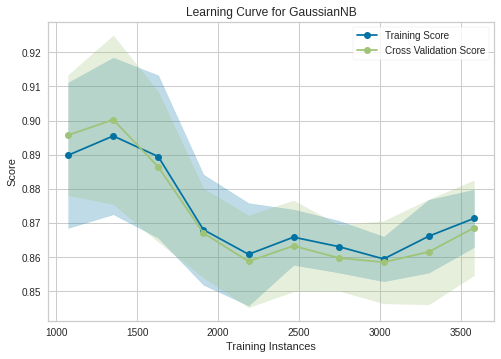

In [ ]:
plot_model(estimator=nb, plot="learning")

# **Matriz de confusão**

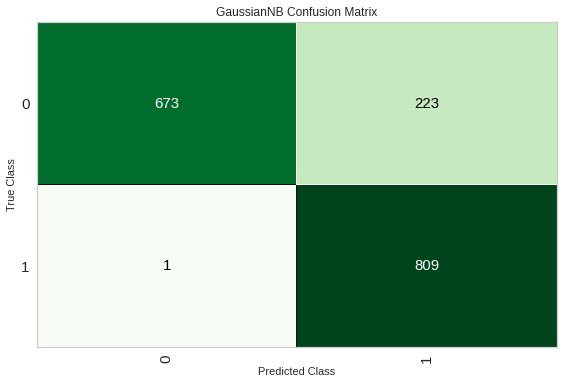

In [ ]:
plot_model(estimator = nb, plot = 'confusion_matrix')

# **Curva ROC**

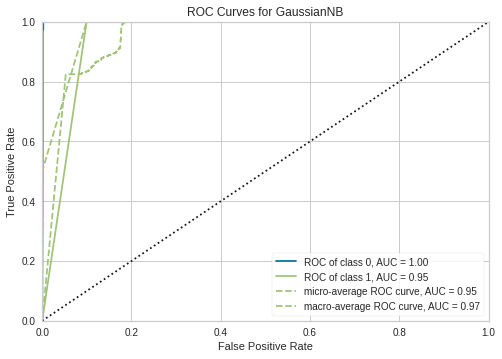

In [ ]:
plot_model(estimator=nb, plot='auc')

# **Apresentação da função "evaluete_model"**

Função que apresenta os principais métodos de avaliação e reprensentação do aprendizado do modelo.

In [ ]:
dt = create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9925,0.9921,0.9921,0.9926,0.9925,0.9849,0.9850
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

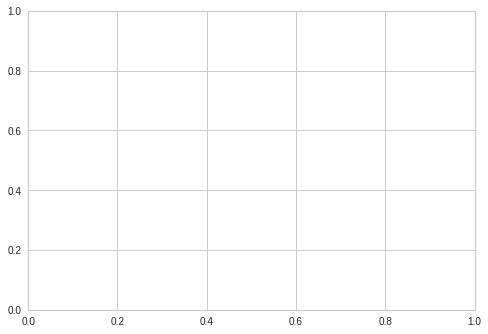

In [ ]:
evaluate_model(dt)

# **Interpretação do modelo**

A importância de cada uma das features para classificação em cada uma das classes.

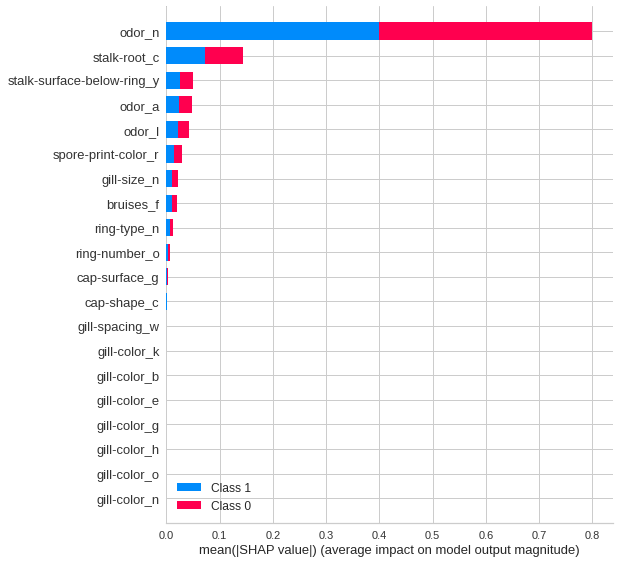

In [ ]:
interpret_model(dt)

# **Predições**

Resposta do modelo em relação aos parâmetros imputados.

In [ ]:
predict_model(dt, data=test)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Label,Score
0,e,x,y,w,t,a,f,c,b,w,e,c,s,s,w,w,p,w,o,p,k,n,m,e,1.0
1,e,f,s,n,f,n,f,w,b,n,t,e,f,s,w,w,p,w,o,e,k,a,g,e,1.0
2,e,x,y,n,t,n,f,c,b,n,t,b,s,s,g,g,p,w,o,p,k,y,d,e,1.0
3,e,b,y,w,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,k,n,g,e,1.0
4,p,k,s,n,f,y,f,c,n,b,t,?,k,k,w,p,p,w,o,e,w,v,d,p,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,e,x,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,o,c,l,e,1.0
2434,p,f,s,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,s,u,p,1.0
2435,p,x,s,e,f,y,f,c,n,b,t,?,s,k,w,p,p,w,o,e,w,v,d,p,1.0
2436,e,x,y,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,g,e,1.0


# **Classificação Multiclasses**

Problemas de classificação caracterizado por conter mais de duas classes.

# **Importando dados**

In [ ]:
from pycaret.datasets import get_data
data1 = get_data('satellite')

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Attribute21,Attribute22,Attribute23,Attribute24,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class
0,80,102,102,79,76,102,102,79,76,102,106,83,76,99,108,85,76,103,118,88,80,107,118,88,79,107,109,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,106,87,76,103,118,88,80,107,118,88,80,112,118,88,79,107,109,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,102,76,80,107,113,85,80,95,100,78,80,95,100,78,79,103,104,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,102,76,80,95,100,78,80,95,100,78,80,91,100,78,79,95,100,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,94,76,80,95,100,78,80,91,100,78,80,91,100,74,79,95,96,75,79,95,100,75,75,95,100,79,4


In [ ]:
data1.columns

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20', 'Attribute21', 'Attribute22',
       'Attribute23', 'Attribute24', 'Attribute25', 'Attribute26',
       'Attribute27', 'Attribute28', 'Attribute29', 'Attribute30',
       'Attribute31', 'Attribute32', 'Attribute33', 'Attribute34',
       'Attribute35', 'Attribute36', 'Class'],
      dtype='object')

In [ ]:
clfm = setup(data=data1,
             target="Class",
             train_size=0.7,
             numeric_features=['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
                              'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
                              'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
                              'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
                              'Attribute19', 'Attribute20', 'Attribute21', 'Attribute22',
                              'Attribute23', 'Attribute24', 'Attribute25', 'Attribute26',
                              'Attribute27', 'Attribute28', 'Attribute29', 'Attribute30',
                              'Attribute31', 'Attribute32', 'Attribute33', 'Attribute34',
                              'Attribute35', 'Attribute36'])

,Description,Value
0,session_id,8394
1,Target,Class
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 7: 5"
4,Original Data,"(6435, 37)"
5,Missing Values,False
6,Numeric Features,36
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9152,0.9916,0.8954,0.9144,0.9138,0.8952,0.8955,1.114
xgboost,Extreme Gradient Boosting,0.9134,0.9915,0.8942,0.9128,0.9123,0.8930,0.8933,4.258
catboost,CatBoost Classifier,0.9107,0.9922,0.8890,0.9096,0.9088,0.8896,0.8901,19.986
et,Extra Trees Classifier,0.9096,0.9916,0.8856,0.9084,0.9074,0.8882,0.8888,0.720
rf,Random Forest Classifier,0.9076,0.9906,0.8842,0.9061,0.9055,0.8857,0.8862,1.063
knn,K Neighbors Classifier,0.8999,0.9823,0.8849,0.9016,0.8999,0.8766,0.8769,0.147
gbc,Gradient Boosting Classifier,0.8937,0.9888,0.8709,0.8932,0.8926,0.8686,0.8689,8.651
qda,Quadratic Discriminant Analysis,0.8486,0.9712,0.7990,0.8366,0.8297,0.8118,0.8151,0.031
dt,Decision Tree Classifier,0.8421,0.9046,0.8194,0.8448,0.8427,0.8054,0.8057,0.074
lda,Linear Discriminant Analysis,0.8375,0.9770,0.7823,0.8323,0.8300,0.7977,0.7998,0.045


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8394, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8958,0.9888,0.8728,0.8968,0.8946,0.8714,0.8721
1,0.9224,0.9916,0.9033,0.9221,0.9216,0.9040,0.9042
2,0.9091,0.9914,0.8829,0.9066,0.9062,0.8876,0.8881
3,0.9335,0.9931,0.9198,0.9326,0.9327,0.9179,0.9180
4,0.9133,0.9902,0.8927,0.9126,0.9124,0.8928,0.8931
5,0.9111,0.9933,0.8951,0.9100,0.9098,0.8904,0.8907
6,0.9222,0.9924,0.8995,0.9203,0.9197,0.9037,0.9042
7,0.9200,0.9911,0.9093,0.9202,0.9197,0.9013,0.9015
8,0.9133,0.9921,0.8925,0.9125,0.9114,0.8927,0.8932
9,0.9111,0.9925,0.8859,0.9104,0.9102,0.8900,0.8902


In [ ]:
evaluate_model(estimator=model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…